# Predicting House Sale Prices

In this project, we'll be using linear regression models to predict house sale prices. The housing data we'll be working with is from the city of Ames, Iowa, in the United States from 2006 to 2010.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline
pd.options.display.max_columns = 150

housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
train = housing[0:1460]
test = housing[1460:]

In [2]:
def transform_features(df):
    threshold = 1460 * 0.25
    
    train_nulls = train.isnull().sum()
    train_null_cols = train_nulls[train_nulls < 355].index
    
    return df[0:1460]

In [3]:
def select_features(df):
    return df[0:1460][['SalePrice', 'Gr Liv Area']]

In [4]:
def train_and_test(df):
    train = df[0:1460]
    test = df[1460:]
    
    features = train.select_dtypes(include = ['float64', 'int64']).columns
    print(features)
    training_feature = 'SalePrice'
    
    lr = LinearRegression()
    lr.fit(train[features], train[training_feature])
    
    predicted_test = lr.predict(test[features])
    # test_rmse = sum(((predicted_test - test['SalePrice'])**2/len(test))**0.5)
    test_rmse = (mean_squared_error(test['SalePrice'], predicted_test))**(1/2)
    
    return test_rmse


We want to begin cleaning our data. To this end, we want to drop any columns that have an excessive number of missing
values. The cutoff threshold that we'll use is if 5% of the data is missing from the column. In this instance we can posit that we are missing too great a portion of the data to reasonably impute it or include it in our model.

In [5]:
import math
threshold = math.floor(0.05*1460) 
train_nulls = train.isnull().sum()

# Find the number of total columns in the data set
len(train_nulls)

82

In [6]:
# Find the number of columns with more than 5% of the data missing
sum(train_nulls > threshold)

11

In [7]:
# Isolate the columns that have a sufficient amount of data
train_null_cols = train_nulls[train_nulls < threshold]

sum(train_null_cols > threshold)

0

In [8]:
train_cleaned = train[train_null_cols.index]

train_cleaned.head()

,Order,PID,MS SubClass,MS Zoning,Lot Area,Street,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Garage Cars,Garage Area,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,31770,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1656,1.0,0.0,1,0,3,1,TA,7,Typ,2,2.0,528.0,P,210,62,0,0,0,0,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,1.0,730.0,Y,140,0,0,0,120,0,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,1.0,312.0,Y,393,36,0,0,0,0,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,11160,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,7,5,1968,1968,Hip,CompShg,BrkFace,BrkFace,None,0.0,Gd,TA,CBlock,TA,TA,No,ALQ,1065.0,Unf,0.0,1045.0,2110.0,GasA,Ex,Y,SBrkr,2110,0,0,2110,1.0,0.0,2,1,3,1,Ex,8,Typ,2,2.0,522.0,Y,0,0,0,0,0,0,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,2.0,482.0,Y,212,34,0,0,0,0,0,3,2010,WD,Normal,189900


In [9]:
train_cleaned.shape

(1460, 71)

In [10]:
# Update our transform features function so that it eliminates the columns that
# are missing more than 5% of their values
def transform_features(df):
    
    threshold = math.floor(0.05*df.shape[0]) 
    nulls = df.isnull().sum()
    null_cols = nulls[nulls < threshold]
    cleaned = df[null_cols.index]
    
    return cleaned[:1460]

train_cleaned = transform_features(housing)

train_cleaned.shape

(1460, 71)

For situations where we are missing less than 5% of the data we will impute the missing data with the most common value (the mode).

In [11]:
# Identify numeric columns that are missing 5% or less of the data
# Ignore columns that don't have any missing values from the start

threshold_impute = math.floor(0.05*housing.shape[0])
imputing = housing.select_dtypes(include = ['float64', 'int64']).isnull().sum()
imputing_cols = imputing[(imputing < threshold_impute) & (imputing > 0)]

imputing_cols.sort_values(ascending = False).head()

Mas Vnr Area      23
Bsmt Half Bath     2
Bsmt Full Bath     2
Garage Area        1
Garage Cars        1
dtype: int64

In [12]:
# Get the list of columns that you wish to impute with the mode
list_imputing = list(imputing_cols.index)

list_imputing

['Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Cars',
 'Garage Area']

In [13]:
# For every column that has less than 5% of the columns missing, impute the value
# with the mode for that column
for col in list_imputing:
    housing[col] = housing[col].fillna(housing[col].mode)

In [14]:
# Update our transform_featurse function to include the value imputing
def transform_features(df):
    
    threshold = math.floor(0.25*df.shape[0]) 
    nulls = df.isnull().sum()
    null_cols = nulls[nulls < threshold]
    cleaned = df[null_cols.index]
    
    threshold_impute = math.floor(0.05*cleaned.shape[0])
    imputing = cleaned.select_dtypes(include = ['float64', 'int64']).isnull().sum()
    imputing_cols = imputing[(imputing < threshold_impute) & (imputing > 0)]
    list_imputing = list(imputing_cols.index)
    for col in list_imputing:
        cleaned[col] = cleaned[col].fillna(cleaned[col].mode)
    
    
    return cleaned[:1460]

# housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
# train = transform_features(housing)

# sum(train.isnull().sum() == 0)

In [15]:
# Furthermore we wish to remove any text columns that are missing any values
# (for now, we may choose to make this data categorical later)

text_data = housing.select_dtypes(include = ['object'])
text_data.columns

Index(['MS Zoning', 'Street', 'Alley', 'Lot Shape', 'Land Contour',
       'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Roof Style', 'Roof Matl',
       'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type', 'Mas Vnr Area',
       'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual', 'Bsmt Cond',
       'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1', 'BsmtFin Type 2',
       'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', 'Heating', 'Heating QC',
       'Central Air', 'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath',
       'Kitchen Qual', 'Functional', 'Fireplace Qu', 'Garage Type',
       'Garage Finish', 'Garage Cars', 'Garage Area', 'Garage Qual',
       'Garage Cond', 'Paved Drive', 'Pool QC', 'Fence', 'Misc Feature',
       'Sale Type', 'Sale Condition'],
      dtype='object')

In [16]:
# Find the number of missing entries in every column
missing_text_data = text_data.isnull().sum()
# Find the columns missing more than 1 data entry
missing_text_data = missing_text_data[missing_text_data > 0]
text_cols_to_drop = list(missing_text_data.index)
len(text_cols_to_drop)

16

In [17]:
# Drop the text columns that are missing any values
housing = housing.drop(labels = text_cols_to_drop, axis = 1)
len(housing.columns)

66

In [18]:
# Update our transform_featurse function to include the column dropping
def transform_features(df):
    
    text_data = df.select_dtypes(include = ['object'])
    missing_text_data = text_data.isnull().sum()
    missing_text_data = missing_text_data[missing_text_data > 0]
    text_cols_to_drop = list(missing_text_data.index)
    df = df.drop(labels = text_cols_to_drop, axis = 1)
    
    threshold = math.floor(0.05*df.shape[0]) 
    nulls = df.isnull().sum()
    null_cols = nulls[nulls < threshold]
    cleaned = df[null_cols.index]
    
    threshold_impute = math.floor(0.05*cleaned.shape[0])
    imputing = cleaned.select_dtypes(include = ['float64', 'int64']).isnull().sum()
    imputing_cols = imputing[(imputing < threshold_impute) & (imputing > 0)]
    list_imputing = list(imputing_cols.index)
    
    copy_cleaned = cleaned.copy()
    for col in list_imputing:
        copy_cleaned[col] = cleaned[col].fillna(cleaned[col].mode)
    
    return copy_cleaned
#     return copy_cleaned[:1460]

In [19]:
housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
# train = transform_features(housing)
housing = transform_features(housing)

sum(train.isnull().sum() == 0)

58

### Feature Engineering
What are some features that we could add from the existing data that may help with our predictions?

Two features that we want to create, the number of years since the house was built and the number of years since the last remodeling or addition to the house.

In [20]:
years_sold = housing['Yr Sold'] - housing['Year Built']
years_sold[years_sold < 0]

2180   -1
dtype: int64

In [21]:
years_since_remod = housing['Yr Sold'] - housing['Year Remod/Add']
years_since_remod[years_since_remod < 0]

1702   -1
2180   -2
2181   -1
dtype: int64

In [22]:
housing['Years Before Sale'] = years_sold
housing['Years Since Remod'] = years_since_remod

# Drop the rows that would have negative values
housing.drop([1702, 2180, 2181], axis = 0, inplace = True)

# Drop the old columns that had this information
housing.drop(['Year Built', 'Year Remod/Add'], axis = 1, inplace = True)

# Drop the columns that aren't useful for machine learning
housing.drop(['PID', 'Order'], axis = 1, inplace = True)

# Drop the columns that leak information about the sale
housing.drop(['Yr Sold', 'Mo Sold', 'Sale Type', 'Sale Condition'], axis = 1, inplace = True)

In [23]:
def select_features(df):
    return df[['SalePrice', 'Gr Liv Area']]

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    features = train.select_dtypes(include = ['float64', 'int64']).columns
    features = features.drop('SalePrice')
    print(features)
    training_feature = 'SalePrice'
    
    lr = LinearRegression()
    lr.fit(train[features], train[training_feature])
    
    predicted_test = lr.predict(test[features])
    # test_rmse = sum(((predicted_test - test['SalePrice'])**2/len(test))**0.5)
    test_rmse = (mean_squared_error(test['SalePrice'], predicted_test))**(1/2)
    
    return test_rmse

def transform_features(df):
    
    # Drop text data that is missing more than one value
    text_data = df.select_dtypes(include = ['object'])
    missing_text_data = text_data.isnull().sum()
    missing_text_data = missing_text_data[missing_text_data > 0]
    text_cols_to_drop = list(missing_text_data.index)
    df = df.drop(labels = text_cols_to_drop, axis = 1)
    
    # Drop any columns that are missing more than 5% of their columns
    threshold = math.floor(0.05*df.shape[0]) 
    nulls = df.isnull().sum()
    null_cols = nulls[nulls < threshold]
    cleaned = df[null_cols.index]
    
    # Impute the mode for numeric columns with fewer than 5% of values missing
    threshold_impute = math.floor(0.05*cleaned.shape[0])
    imputing = cleaned.select_dtypes(include = ['float64', 'int64']).isnull().sum()
    imputing_cols = imputing[(imputing < threshold_impute) & (imputing > 0)]
    list_imputing = list(imputing_cols.index)
    
    copy_cleaned = cleaned.copy()
    for col in list_imputing:
        copy_cleaned[col] = cleaned[col].fillna(cleaned[col].mode)
        
    years_sold = copy_cleaned['Yr Sold'] - copy_cleaned['Year Built']
    years_since_remod = copy_cleaned['Yr Sold'] - copy_cleaned['Year Remod/Add']
    
    copy_cleaned['Years Since Remod'] = years_since_remod
    copy_cleaned['Years Before Sale'] = years_sold
    copy_cleaned.drop([1702, 2180, 2181], axis = 0, inplace = True)
    copy_cleaned.drop(['Yr Sold', 'Mo Sold', 'Sale Type', 'Sale Condition', 'Year Built', 'Year Remod/Add', 'PID', 'Order'], axis = 1, inplace = True)
    
    
    return copy_cleaned

In [24]:
housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
housing = transform_features(housing)
feature_subset = select_features(housing)
rmse = train_and_test(feature_subset)

rmse

Index(['Gr Liv Area'], dtype='object')


55275.36731241307

In [25]:
housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
housing = transform_features(housing)

### Feature Selection

Now that we've done some preliminary data cleaning and analysis we want to see which features we want to include in our final model. We'll begin by generating a heatmap of the correlations between different columns.

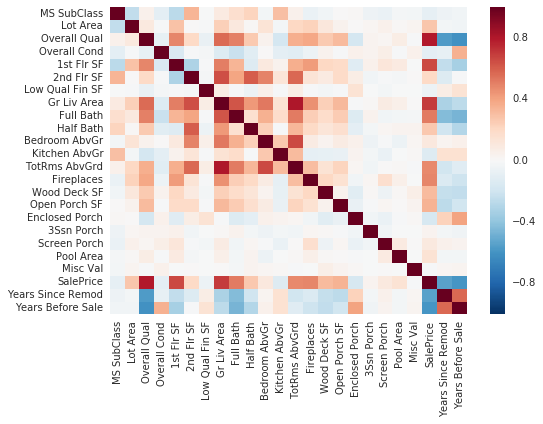

In [26]:
# 1. Generate a correlation heatmap matrix of the numerical features in the 
# training set
import seaborn as sns

train = housing[:1460]
train_num = train.select_dtypes(include = ['float64', 'int64'])
correlations = train_num.corr()
sns.heatmap(correlations)

Now we can isolate the correlations related to SalePrice column so that we can get a better idea of how each factor may influence the house sale price.

(1460, 24)

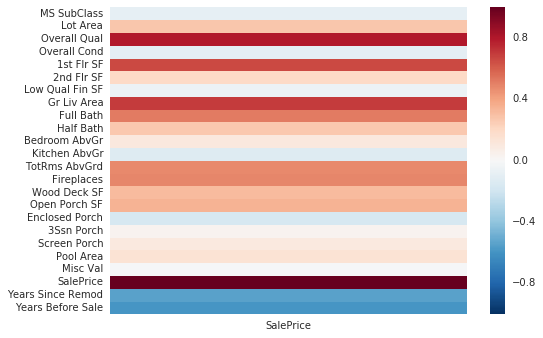

In [27]:
# Let's take a closer look at the correlations for the SalePrice column
sns.heatmap(correlations[['SalePrice']])
train_num.shape

There seem to be a number of columns that are poorly correlated or very weekly correlated. For now we will take columns that have an absolute correlation greater that 0.4.

In [28]:
strong_corr = correlations[correlations['SalePrice'].abs() > 0.4]
strong_corr

,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Since Remod,Years Before Sale
Overall Qual,0.054533,0.100290,1.000000,-0.083581,0.490056,0.200105,-0.070362,0.562903,0.505102,0.260307,0.045648,-0.175562,0.360203,0.386205,0.260258,0.319954,-0.173024,0.032751,0.023194,0.072357,-0.009641,0.804562,-0.567849,-0.606583
1st Flr SF,-0.273248,0.295995,0.490056,-0.154903,1.000000,-0.311660,-0.011781,0.515404,0.341061,-0.130409,0.095281,0.041101,0.360595,0.429662,0.206013,0.191891,-0.118127,0.053525,0.120276,0.092472,-0.000546,0.657119,-0.245144,-0.329150
Gr Liv Area,0.089580,0.239224,0.562903,-0.133710,0.515404,0.647971,0.075539,1.000000,0.625981,0.435941,0.523904,0.145693,0.807301,0.460746,0.238396,0.321806,-0.012603,0.008241,0.080250,0.054693,0.000851,0.698990,-0.312621,-0.260165
Full Bath,0.168263,0.107753,0.505102,-0.223043,0.341061,0.396149,-0.013896,0.625981,1.000000,0.163007,0.358622,0.183130,0.517731,0.245036,0.180358,0.255968,-0.139366,0.043506,-0.037269,-0.027145,-0.020655,0.518194,-0.430709,-0.468702
TotRms AbvGrd,0.054067,0.205604,0.360203,-0.116560,0.360595,0.570879,0.073844,0.807301,0.517731,0.332147,0.660762,0.312851,1.000000,0.307189,0.148162,0.222774,0.017951,-0.031988,0.003138,0.009930,-0.008059,0.483701,-0.189389,-0.118577
Fireplaces,-0.064293,0.232112,0.386205,-0.056623,0.429662,0.133245,-0.011067,0.460746,0.245036,0.200749,0.082734,-0.091818,0.307189,1.000000,0.209153,0.148664,-0.032654,0.022946,0.168236,0.056816,-0.002616,0.485683,-0.145508,-0.205146
SalePrice,-0.088504,0.274730,0.804562,-0.099395,0.657119,0.202352,-0.060352,0.698990,0.518194,0.272870,0.106941,-0.130843,0.483701,0.485683,0.319104,0.344383,-0.165873,0.038699,0.100121,0.145474,-0.009903,1.000000,-0.546212,-0.592273
Years Since Remod,-0.050397,-0.024045,-0.567849,-0.085781,-0.245144,-0.139041,0.074166,-0.312621,-0.430709,-0.202022,0.026969,0.149802,-0.189389,-0.145508,-0.236743,-0.264721,0.229018,-0.025405,0.047684,-0.024229,0.021826,-0.546212,1.000000,0.577262
Years Before Sale,-0.031547,-0.031917,-0.606583,0.354148,-0.329150,-0.014295,0.146907,-0.260165,-0.468702,-0.295039,0.049345,0.154660,-0.118577,-0.205146,-0.248055,-0.192802,0.405023,-0.040154,0.033755,-0.028377,0.029247,-0.592273,0.577262,1.000000


In [29]:
high_corr = strong_corr.index
high_corr = high_corr.drop('SalePrice')
high_corr

Index(['Overall Qual', '1st Flr SF', 'Gr Liv Area', 'Full Bath',
       'TotRms AbvGrd', 'Fireplaces', 'Years Since Remod',
       'Years Before Sale'],
      dtype='object')

There are a number of nominal columns that could be better described as categorical since there is no real meaning to their numbers. However, we don't want to do this for every one of these columns since we would end up with in excess of 100 dummy variable columns. Therefore we have to see how many unique values there are for these columns to determine whether they are worth encoding as dummy variables.

In [30]:
## Create a list of column names from documentation that are *meant* to be categorical
nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]

In [31]:
# Find how many unique values there are in these columns
unique_val_dict = {}
for feature in nominal_features:
    if feature in train.columns:
        unique_vals = len(train[feature].value_counts())
        unique_val_dict[feature] = unique_vals
unique_val_dict

{'Bldg Type': 5,
 'Central Air': 2,
 'Condition 1': 9,
 'Condition 2': 6,
 'Exterior 1st': 14,
 'Exterior 2nd': 16,
 'Foundation': 6,
 'Heating': 6,
 'House Style': 8,
 'Land Contour': 4,
 'Lot Config': 5,
 'MS SubClass': 15,
 'MS Zoning': 6,
 'Neighborhood': 26,
 'Roof Matl': 5,
 'Roof Style': 6,
 'Street': 2}

We see that Exterior 1st, Exterior 2nd, MS SubClass and Neighborhood have a large number of unique values, adding all these columns to the dataframe may not be worth the slight increase in performance we would get.

Next we want to see what the distribution is like .

In [32]:
most_pop_vals = {}
for feature in nominal_features:
    if feature in train.columns:
        most_pop = train[feature].value_counts().head(1)
        most_pop_vals[feature] = most_pop
        
most_pop_vals

{'Bldg Type': 1Fam    1211
 Name: Bldg Type, dtype: int64, 'Central Air': Y    1366
 Name: Central Air, dtype: int64, 'Condition 1': Norm    1240
 Name: Condition 1, dtype: int64, 'Condition 2': Norm    1442
 Name: Condition 2, dtype: int64, 'Exterior 1st': VinylSd    507
 Name: Exterior 1st, dtype: int64, 'Exterior 2nd': VinylSd    498
 Name: Exterior 2nd, dtype: int64, 'Foundation': PConc    642
 Name: Foundation, dtype: int64, 'Heating': GasA    1435
 Name: Heating, dtype: int64, 'House Style': 1Story    743
 Name: House Style, dtype: int64, 'Land Contour': Lvl    1335
 Name: Land Contour, dtype: int64, 'Lot Config': Inside    1060
 Name: Lot Config, dtype: int64, 'MS SubClass': 20    551
 Name: MS SubClass, dtype: int64, 'MS Zoning': RL    1123
 Name: MS Zoning, dtype: int64, 'Neighborhood': NAmes    239
 Name: Neighborhood, dtype: int64, 'Roof Matl': CompShg    1439
 Name: Roof Matl, dtype: int64, 'Roof Style': Gable    1150
 Name: Roof Style, dtype: int64, 'Street': Pave    1455


In [33]:
# Find which columns have primarily one value for all the entries
threshold = math.floor(0.95*train.shape[0])
small_var = []
for entry in most_pop_vals:
    # print(entry)
    # print(most_pop_vals[entry].iloc[0])
    if most_pop_vals[entry].iloc[0] > threshold:
        small_var.append(entry)

small_var
        


['Street', 'Condition 2', 'Roof Matl', 'Heating']

We can see that Heating, Street, Roof Matl, and Condition 2 have over 95% of
their entries with one value.

Since this presents a pretty small amount of variance between the 1461 samples,
we canwill drop these columns since we suspect the benefit they will provide to our model is rather minimal.

So the columns we will drop are: Heating, Street, Roof Matl, Condition 2, 
Exterior 1st, Exterior 2nd, MS Subclass and Neighborhood

In [34]:
to_drop = ['Heating', 'Street', 'Roof Matl', 'Condition 2', 'Exterior 1st', 'Exterior 2nd', 'MS Subclass', 'Neighborhood']

for col in to_drop:
    if col in train.columns:
        train = train.drop(col, axis = 1)

In [35]:
text_cols = train.select_dtypes(include=['object'])
# text_cols = text_cols.columns
text_cols

,MS Zoning,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Condition 1,Bldg Type,House Style,Roof Style,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating QC,Central Air,Bsmt Full Bath,Bsmt Half Bath,Kitchen Qual,Functional,Garage Cars,Garage Area,Paved Drive
0,RL,IR1,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,Hip,112,TA,TA,CBlock,639,0,441,1080,Fa,Y,1,0,TA,Typ,2,528,P
1,RH,Reg,Lvl,AllPub,Inside,Gtl,Feedr,1Fam,1Story,Gable,0,TA,TA,CBlock,468,144,270,882,TA,Y,0,0,TA,Typ,1,730,Y
2,RL,IR1,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,Hip,108,TA,TA,CBlock,923,0,406,1329,TA,Y,0,0,Gd,Typ,1,312,Y
3,RL,Reg,Lvl,AllPub,Corner,Gtl,Norm,1Fam,1Story,Hip,0,Gd,TA,CBlock,1065,0,1045,2110,Ex,Y,1,0,Ex,Typ,2,522,Y
4,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,Gable,0,TA,TA,PConc,791,0,137,928,Gd,Y,0,0,TA,Typ,2,482,Y
5,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,Gable,20,TA,TA,PConc,602,0,324,926,Ex,Y,0,0,Gd,Typ,2,470,Y
6,RL,Reg,Lvl,AllPub,Inside,Gtl,Norm,TwnhsE,1Story,Gable,0,Gd,TA,PConc,616,0,722,1338,Ex,Y,1,0,Gd,Typ,2,582,Y
7,RL,IR1,HLS,AllPub,Inside,Gtl,Norm,TwnhsE,1Story,Gable,0,Gd,TA,PConc,263,0,1017,1280,Ex,Y,0,0,Gd,Typ,2,506,Y
8,RL,IR1,Lvl,AllPub,Inside,Gtl,Norm,TwnhsE,1Story,Gable,0,Gd,TA,PConc,1180,0,415,1595,Ex,Y,1,0,Gd,Typ,2,608,Y
9,RL,Reg,Lvl,AllPub,Inside,Gtl,Norm,1Fam,2Story,Gable,0,TA,TA,PConc,0,0,994,994,Gd,Y,0,0,Gd,Typ,2,442,Y


In [36]:
housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
for col in text_cols.columns:
    housing[col] = housing[col].astype('category')
housing = transform_features(housing)
for col in to_drop:
    if col in housing.columns:
        housing = housing.drop(col, axis = 1)

In [37]:
housing = pd.concat([
    housing, 
    pd.get_dummies(housing.select_dtypes(include=['category']))
], axis=1).drop(text_cols,axis=1)

In [38]:
housing.head()

,MS SubClass,Lot Area,Overall Qual,Overall Cond,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,SalePrice,Years Since Remod,Years Before Sale,MS Zoning_A (agr),MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Shape_IR1,Lot Shape_IR2,Lot Shape_IR3,Lot Shape_Reg,Land Contour_Bnk,Land Contour_HLS,Land Contour_Low,Land Contour_Lvl,Utilities_AllPub,Utilities_NoSeWa,Utilities_NoSewr,Lot Config_Corner,Lot Config_CulDSac,Lot Config_FR2,Lot Config_FR3,Lot Config_Inside,Land Slope_Gtl,Land Slope_Mod,Land Slope_Sev,Condition 1_Artery,Condition 1_Feedr,Condition 1_Norm,Condition 1_PosA,Condition 1_PosN,Condition 1_RRAe,Condition 1_RRAn,Condition 1_RRNe,Condition 1_RRNn,Bldg Type_1Fam,Bldg Type_2fmCon,Bldg Type_Duplex,Bldg Type_Twnhs,Bldg Type_TwnhsE,House Style_1.5Fin,House Style_1.5Unf,House Style_1Story,House Style_2.5Fin,House Style_2.5Unf,House Style_2Story,House Style_SFoyer,House Style_SLvl,Roof Style_Flat,Roof Style_Gable,Roof Style_Gambrel,...,Garage Area_889.0,Garage Area_890.0,Garage Area_892.0,Garage Area_894.0,Garage Area_895.0,Garage Area_896.0,Garage Area_898.0,Garage Area_899.0,Garage Area_900.0,Garage Area_902.0,Garage Area_904.0,Garage Area_905.0,Garage Area_907.0,Garage Area_908.0,Garage Area_912.0,Garage Area_916.0,Garage Area_920.0,Garage Area_923.0,Garage Area_924.0,Garage Area_925.0,Garage Area_927.0,Garage Area_928.0,Garage Area_932.0,Garage Area_933.0,Garage Area_936.0,Garage Area_938.0,Garage Area_944.0,Garage Area_947.0,Garage Area_949.0,Garage Area_954.0,Garage Area_958.0,Garage Area_959.0,Garage Area_962.0,Garage Area_963.0,Garage Area_968.0,Garage Area_972.0,Garage Area_983.0,Garage Area_984.0,Garage Area_995.0,Garage Area_1003.0,Garage Area_1008.0,Garage Area_1014.0,Garage Area_1017.0,Garage Area_1020.0,Garage Area_1025.0,Garage Area_1040.0,Garage Area_1041.0,Garage Area_1043.0,Garage Area_1052.0,Garage Area_1053.0,Garage Area_1069.0,Garage Area_1085.0,Garage Area_1092.0,Garage Area_1105.0,Garage Area_1110.0,Garage Area_1134.0,Garage Area_1138.0,Garage Area_1150.0,Garage Area_1154.0,Garage Area_1166.0,Garage Area_1174.0,Garage Area_1184.0,Garage Area_1200.0,Garage Area_1220.0,Garage Area_1231.0,Garage Area_1248.0,Garage Area_1314.0,Garage Area_1348.0,Garage Area_1356.0,Garage Area_1390.0,Garage Area_1418.0,Garage Area_1488.0,Paved Drive_N,Paved Drive_P,Paved Drive_Y
0,20,31770,6,5,1656,0,0,1656,1,0,3,1,7,2,210,62,0,0,0,0,0,215000,50,50,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
1,20,11622,5,6,896,0,0,896,1,0,2,1,5,0,140,0,0,0,120,0,0,105000,49,49,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,20,14267,6,6,1329,0,0,1329,1,1,3,1,6,0,393,36,0,0,0,0,12500,172000,52,52,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,20,11160,7,5,2110,0,0,2110,2,1,3,1,8,2,0,0,0,0,0,0,0,244000,42,42,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,60,13830,5,5,928,701,0,1629,2,1,3,1,6,1,212,34,0,0,0,0,0,189900,12,13,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,

In [39]:
# Update our functions
def select_features(df, corr_threshold = 0.4, num_cat_threshold=10):
    
    df_num = df.select_dtypes(include = ['float64', 'int64'])
    correlations = train_num.corr()
    corr = correlations[correlations['SalePrice'].abs() < corr_threshold]
    weakly_correlated = corr.index 
    df = df.drop(weakly_correlated, axis = 1)
    
    ## Create a list of column names from documentation that are *meant* to be categorical
    nominal_features = ["PID", "MS SubClass", "MS Zoning", "Street", "Alley", "Land Contour", "Lot Config", "Neighborhood", 
                    "Condition 1", "Condition 2", "Bldg Type", "House Style", "Roof Style", "Roof Matl", "Exterior 1st", 
                    "Exterior 2nd", "Mas Vnr Type", "Foundation", "Heating", "Central Air", "Garage Type", 
                    "Misc Feature", "Sale Type", "Sale Condition"]
    
    for feature in nominal_features:
        if feature in df.columns:
            unique_vals = len(df[feature].value_counts())
            most_pop = df[feature].value_counts().head(1)
            if unique_vals > num_cat_threshold:
                to_drop.append(feature)
            if most_pop.iloc[0] > math.floor(0.95*df.shape[0]):
                to_drop.append(feature)

    for col in to_drop:
        if col in df.columns:
            df = df.drop(col, axis = 1)
    
    text_cols = df.select_dtypes(include = ['object'])
    text_cols = text_cols.columns
    
    for col in text_cols:
        df[col] = df[col].astype('category')
        
    df = pd.concat([df, pd.get_dummies(df.select_dtypes(include=['category']))], axis=1).drop(text_cols,axis=1)
    
    return df

def transform_features(df):
    
    # Drop text data that is missing more than one value
    text_data = df.select_dtypes(include = ['object'])
    missing_text_data = text_data.isnull().sum()
    missing_text_data = missing_text_data[missing_text_data > 0]
    text_cols_to_drop = list(missing_text_data.index)
    df = df.drop(labels = text_cols_to_drop, axis = 1)
    
    # Drop any columns that are missing more than 5% of their columns
    threshold = math.floor(0.05*df.shape[0]) 
    nulls = df.isnull().sum()
    null_cols = nulls[nulls < threshold]
    df = df[null_cols.index]
    
    # Impute the mode for numeric columns with fewer than 5% of values missing
    threshold_impute = math.floor(0.05*df.shape[0])
    imputing = df.select_dtypes(include = ['float64', 'int64']).isnull().sum()
    imputing_cols = imputing[(imputing < threshold_impute) & (imputing > 0)]
    list_imputing = list(imputing_cols.index)

    modes = {}
    for col in list_imputing:
        modes[col] = df[col].mode().iloc[0]
        
    df = df.fillna(modes)

    years_sold = df['Yr Sold'] - df['Year Built']
    years_since_remod = df['Yr Sold'] - df['Year Remod/Add']
    
    df['Years Since Remod'] = years_since_remod
    df['Years Before Sale'] = years_sold
    df = df.drop([1702, 2180, 2181], axis = 0)
    df = df.drop(['Yr Sold', 'Mo Sold', 'Sale Type', 'Sale Condition', 'Year Built', 'Year Remod/Add', 'PID', 'Order'], axis = 1)
    
    
    return df

def train_and_test(df):
    train = df[:1460]
    test = df[1460:]
    
    features = train.select_dtypes(include = ['float64', 'int64']).columns
    features = features.drop('SalePrice')
    print(features)
    training_feature = 'SalePrice'
    
    lr = LinearRegression()
    lr.fit(train[features], train[training_feature])
    
    predicted_test = lr.predict(test[features])
    test_rmse = (mean_squared_error(test['SalePrice'], predicted_test))**(1/2)
    
    return test_rmse

In [40]:
housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
housing_1_me = transform_features(housing)
housing_2_me = select_features(housing_1_me)

In [58]:
from sklearn.model_selection import KFold
def train_and_test(df, k=0):

    features = df.select_dtypes(include = ['float64', 'int64']).columns
    features = features.drop('SalePrice')
    training_feature = 'SalePrice'
    
    if k == 0:
        train = df[:1460]
        test = df[1460:]
    
        lr = LinearRegression()
        lr.fit(train[features], train[training_feature])
    
        predicted_test = lr.predict(test[features])
        test_rmse = (mean_squared_error(test['SalePrice'], predicted_test))**(1/2)
        
    elif k == 1: 
        df = df.sample(frac=1).reset_index(drop=True)
        fold_one = df[:1460]
        fold_two = df[1460:]
        
        lr = LinearRegression()
        lr.fit(fold_one[features], fold_one[training_feature])
        
        predicted_one = lr.predict(fold_two[features])
        rmse_one = (mean_squared_error(fold_two['SalePrice'], predicted_one))**(1/2)
        
        lr.fit(fold_two[features], fold_two[training_features])
        
        predicted_two = lr.predict(fold_one[features])
        rmse_two = (mean_squared_error(fold_one['SalePrice'], predicted_two))**(1/2)
    
        test_rmse = (rmse_one + rmse_two)/2
        
    else:
        rmses = []
        lr = LinearRegression()
        kf = KFold(k, shuffle = True, random_state = 1)
        for train_index, test_index in kf.split(df):
            x_train, x_test = df[features].iloc[train_index], df[features].iloc[test_index]
            y_train, y_test = df[training_feature].iloc[train_index], df[training_feature].iloc[test_index]
            
            lr.fit(x_train, y_train)
            predictions = lr.predict(x_test)
            rmses.append(mean_squared_error(y_test, predictions)**(1/2))
            print(rmses)
            
        test_rmse = np.mean(rmses)
        
        
    
    return test_rmse

In [60]:
housing = pd.read_csv('AmesHousing.tsv', delimiter = '\t')
housing_1_me = transform_features(housing)
housing_2_me = select_features(housing_1_me)
rmse = train_and_test(housing_2_me, 4)
print(rmse)

[40732.347963851964]
[40732.347963851964, 28948.56433114337]
[40732.347963851964, 28948.56433114337, 28616.521565243325]
[40732.347963851964, 28948.56433114337, 28616.521565243325, 32583.245830690023]
32720.16992273217


# Conclusion

In this project we explored aspects of building a machine learning model for predicting house prices. We handled various data processing tasks including dealing with missing values, data cleaning and data exploration. From the machine learning side we performed feature selection and engineering and applied it to our model which we evaluated with k-fold cross validation.